# Supplemental Figure S4

We estimate the dispersal rate from a single tree simulated under unbounded space with no competition to verify the accuracy of our method. 

# Data File Generation Instructions 

The .trees files used in the code below were generated using `UnboundedSpace_SingleTree.slim` SLiM file. The value of SIGMA_disp was changed manually to values 0.25, 0.5, 0.75, 1, 1.5, 1.75 and the SLiM file rerun. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sparg
import tskit


2313
0
1
2
3
4


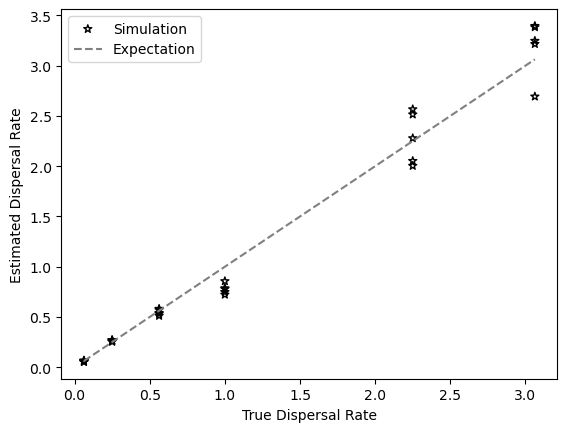

In [3]:
seed = int(np.random.random()*10000)
print(seed)
np.random.seed(6463) #6463 was used for generating the figure in the manuscript.
n=100
ts = tskit.load("slim_disp_0.25_nobound_rep1sigma.trees")
disprate_rng = [0.25,0.5,0.75,1,1.5,1.75]
for rep in range(5):
    print(rep)
    disp=[]
    for disprate in [0.25,0.5,0.75,1,1.5,1.75]:
        ts = tskit.load("slim_disp_"+str(disprate)+"_nobound_rep1sigma.trees")
        keep_nodes = list(np.random.choice(ts.samples(), n, replace=False))

        ts_sim, sim_map = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
        ts_filtered, filtered_maps = sparg.simplify_with_recombination(ts=ts_sim)
        ts_breaks = ts_filtered.breakpoints(as_array=True)
        bp = ts_breaks[1]
        ts_short = ts_filtered.keep_intervals(intervals=[(0,bp)], simplify=False).trim()
        ts_short_sim, maps_short_sim = sparg.simplify_with_recombination(ts=ts_short)
        ts_short_attached = sparg.chop_arg(ts=ts_short, time = ts_short.max_time )
        FullARG = sparg.SpatialARG(ts=ts_short, dimensions=2, verbose=False)
        disp += [(FullARG.dispersal_rate_matrix[0][0] +FullARG.dispersal_rate_matrix[1][1])*(n/(n-1))/2]
    if rep == 0:
        plt.scatter(np.array(disprate_rng)**2,disp,marker='*',color="none",edgecolors='black', label = 'Simulation')
    else:
        plt.scatter(np.array(disprate_rng)**2,disp,marker='*',color="none",edgecolors='black')
plt.plot(np.array(disprate_rng)**2,np.array(disprate_rng)**2,linestyle='--',color='grey', label = 'Expectation')
plt.xlabel("True Dispersal Rate")
plt.ylabel("Estimated Dispersal Rate")
plt.legend()
plt.savefig('UnboundedSimulations.png',format='png')